In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import pickle
import numpy as np
from keras_preprocessing.sequence import pad_sequences
from util import preprocess
from util import generate_batch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from util import cm_plot

2023-03-28 21:24:22.885664: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:24:22.978911: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:24:23.381411: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:24:24.291833: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:24:24.300991: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.0
Normalized confusion matrix
[[8.58796296e-01 8.10185185e-02 2.31481481e-03 9.25925926e-03
  6.94444444e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.16666667e-02 0.00000000e+00]
 [2.35294118e-01 7.05882353e-01 0.00000000e+00 5.88235294e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.88000000e-01 9.60000000e-02
  2.66666667e-03 8.00000000e-03 0.00000000e+00 0.00000000e+00
  5.33333333e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e-02 8.00000000e-02 9.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.75482094e-03 1.10192837e-02 2.75482094e-02 4.13223140e-02
  6.47382920e-01 2.01101928e-01 8.26446281e-03 1.92837466e-02
  2.75482094e-03 8.26446281e-03 3.03030303e-02]
 [1.06382979e-03 5.31914894e-04 5.31914894e-04 1.06382

2023-03-28 21:27:37.964552: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:27:38.257932: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:27:38.267131: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:27:38.376912: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:27:38.597772: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.1
Normalized confusion matrix
[[0.84953704 0.08333333 0.00231481 0.01157407 0.         0.00462963
  0.         0.         0.         0.04861111 0.        ]
 [0.47058824 0.52941176 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.00533333 0.         0.83733333 0.128      0.01333333 0.01066667
  0.         0.         0.00533333 0.         0.        ]
 [0.04       0.02       0.14       0.78       0.         0.
  0.         0.         0.         0.02       0.        ]
 [0.00826446 0.         0.01101928 0.02754821 0.68044077 0.17906336
  0.01101928 0.03030303 0.         0.00275482 0.04958678]
 [0.00106383 0.         0.00212766 0.00212766 0.13829787 0.80425532
  0.05106383 0.         0.         0.         0.00106383]
 [0.         0.         0.         0.         0.00444444 0.01333333
  0.97777778 0.         0.         0.         0.00444444]
 [0.         0.         0.         0.         0.

2023-03-28 21:30:51.229174: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:30:51.618894: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:30:51.926867: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:30:51.935716: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:30:52.479157: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 6s 6s/step
cm_no.2
Normalized confusion matrix
[[8.63425926e-01 7.40740741e-02 4.62962963e-03 4.62962963e-03
  1.62037037e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.70370370e-02 0.00000000e+00]
 [1.76470588e-01 8.23529412e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.04000000e-01 8.26666667e-02
  1.33333333e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00000000e-02 0.00000000e+00 1.20000000e-01 8.20000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 2.47933884e-02 3.58126722e-02
  6.88705234e-01 1.68044077e-01 8.26446281e-03 3.58126722e-02
  0.00000000e+00 2.75482094e-03 2.75482094e-02]
 [1.06382979e-03 0.00000000e+00 5.31914894e-04 1.06382

2023-03-28 21:34:05.678194: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:34:05.939972: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:34:06.555343: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:34:06.780282: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:34:06.862962: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.3
Normalized confusion matrix
[[8.56481481e-01 9.02777778e-02 4.62962963e-03 9.25925926e-03
  0.00000000e+00 2.31481481e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.70370370e-02 0.00000000e+00]
 [5.88235294e-02 8.23529412e-01 0.00000000e+00 5.88235294e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.88235294e-02 0.00000000e+00]
 [2.66666667e-03 0.00000000e+00 8.40000000e-01 1.28000000e-01
  8.00000000e-03 8.00000000e-03 2.66666667e-03 0.00000000e+00
  1.06666667e-02 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 4.00000000e-02 1.60000000e-01 7.60000000e-01
  2.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.10192837e-02 2.75482094e-03 1.65289256e-02 4.95867769e-02
  6.36363636e-01 2.09366391e-01 8.26446281e-03 3.30578512e-02
  2.75482094e-03 2.75482094e-03 2.75482094e-02]
 [5.31914894e-04 5.31914894e-04 5.31914894e-04 0.00000

2023-03-28 21:37:18.388273: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:37:18.399199: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:37:18.845575: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:37:18.854679: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:37:19.270781: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.4
Normalized confusion matrix
[[8.75000000e-01 8.10185185e-02 2.31481481e-03 4.62962963e-03
  2.31481481e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.47222222e-02 0.00000000e+00]
 [1.76470588e-01 8.23529412e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.33333333e-03 8.77333333e-01 9.06666667e-02
  2.66666667e-03 1.86666667e-02 2.66666667e-03 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 0.00000000e+00 1.60000000e-01 8.20000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.37741047e-02 3.03030303e-02
  6.61157025e-01 2.14876033e-01 5.50964187e-03 4.13223140e-02
  0.00000000e+00 2.75482094e-03 2.20385675e-02]
 [1.59574468e-03 0.00000000e+00 1.06382979e-03 5.31914

2023-03-28 21:40:32.793768: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:40:33.084009: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:40:33.092944: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:40:33.202192: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:40:33.417993: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.5
Normalized confusion matrix
[[8.58796296e-01 8.56481481e-02 0.00000000e+00 6.94444444e-03
  2.31481481e-03 2.31481481e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.39814815e-02 0.00000000e+00]
 [5.88235294e-02 9.41176471e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.66666667e-03 0.00000000e+00 8.40000000e-01 1.20000000e-01
  1.06666667e-02 2.13333333e-02 5.33333333e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 4.00000000e-02 4.00000000e-02 8.40000000e-01
  6.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.92837466e-02 4.95867769e-02
  6.66666667e-01 1.65289256e-01 5.50964187e-03 4.68319559e-02
  0.00000000e+00 2.75482094e-03 3.58126722e-02]
 [1.06382979e-03 1.59574468e-03 0.00000000e+00 0.00000

2023-03-28 21:43:48.412765: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:43:49.097848: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:43:49.339739: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:43:49.348563: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:43:49.557228: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.6
Normalized confusion matrix
[[8.56481481e-01 6.25000000e-02 2.31481481e-03 1.15740741e-02
  1.15740741e-02 0.00000000e+00 2.31481481e-03 0.00000000e+00
  0.00000000e+00 5.32407407e-02 0.00000000e+00]
 [2.94117647e-01 6.47058824e-01 0.00000000e+00 5.88235294e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.66666667e-03 0.00000000e+00 8.58666667e-01 1.20000000e-01
  5.33333333e-03 5.33333333e-03 2.66666667e-03 0.00000000e+00
  5.33333333e-03 0.00000000e+00 0.00000000e+00]
 [4.00000000e-02 0.00000000e+00 1.80000000e-01 7.60000000e-01
  2.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 2.20385675e-02 4.40771350e-02
  6.55647383e-01 2.28650138e-01 0.00000000e+00 1.10192837e-02
  0.00000000e+00 2.75482094e-03 2.75482094e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.31914

2023-03-28 21:47:04.644543: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:47:04.840355: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:47:05.020135: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:47:05.029336: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:47:05.193995: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.7
Normalized confusion matrix
[[8.86574074e-01 6.71296296e-02 2.31481481e-03 9.25925926e-03
  2.31481481e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.77777778e-02 4.62962963e-03]
 [1.17647059e-01 8.82352941e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.58666667e-01 1.30666667e-01
  2.66666667e-03 5.33333333e-03 0.00000000e+00 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 2.00000000e-02 1.00000000e-01 8.60000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.92837466e-02 6.33608815e-02
  6.47382920e-01 1.68044077e-01 1.10192837e-02 3.58126722e-02
  5.50964187e-03 5.50964187e-03 3.58126722e-02]
 [1.59574468e-03 0.00000000e+00 5.31914894e-04 0.00000

2023-03-28 21:50:18.725756: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:50:19.234530: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:50:19.384881: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:50:19.393508: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:50:19.423699: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_sh

1/1 [==============================] - 3s 3s/step
cm_no.8
Normalized confusion matrix
[[8.47222222e-01 8.56481481e-02 2.31481481e-03 6.94444444e-03
  0.00000000e+00 2.31481481e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.32407407e-02 2.31481481e-03]
 [1.17647059e-01 8.82352941e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.37333333e-01 1.36000000e-01
  1.60000000e-02 2.66666667e-03 5.33333333e-03 0.00000000e+00
  2.66666667e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e-02 1.80000000e-01 8.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.65289256e-02 5.23415978e-02
  6.41873278e-01 1.87327824e-01 8.26446281e-03 4.68319559e-02
  0.00000000e+00 5.50964187e-03 3.30578512e-02]
 [5.31914894e-04 0.00000000e+00 0.00000000e+00 0.00000

2023-03-28 21:53:31.717055: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:53:33.590734: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-28 21:53:33.702962: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:53:33.711754: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 48 outputs. Output shapes may be inaccurate.
2023-03-28 21:53:33.921950: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _ou

1/1 [==============================] - 3s 3s/step
cm_no.9
Normalized confusion matrix
[[8.31018519e-01 1.15740741e-01 4.62962963e-03 4.62962963e-03
  2.31481481e-03 4.62962963e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.70370370e-02 0.00000000e+00]
 [3.52941176e-01 6.47058824e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.77333333e-01 9.60000000e-02
  1.33333333e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.33333333e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e-02 8.00000000e-02 8.80000000e-01
  0.00000000e+00 2.00000000e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.37741047e-02 0.00000000e+00 3.58126722e-02 3.85674931e-02
  6.61157025e-01 1.62534435e-01 8.26446281e-03 3.03030303e-02
  2.75482094e-03 8.26446281e-03 3.85674931e-02]
 [1.06382979e-03 0.00000000e+00 0.00000000e+00 5.31914

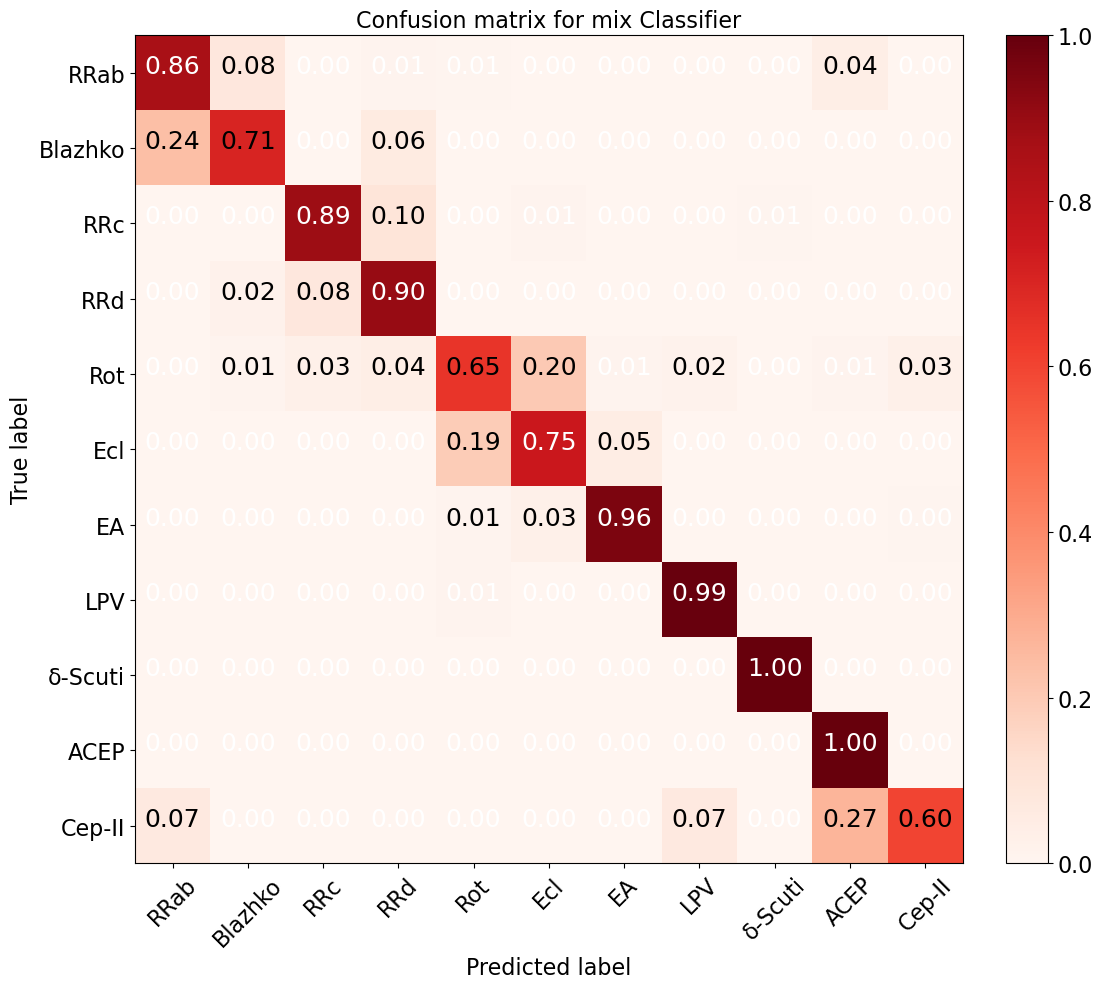

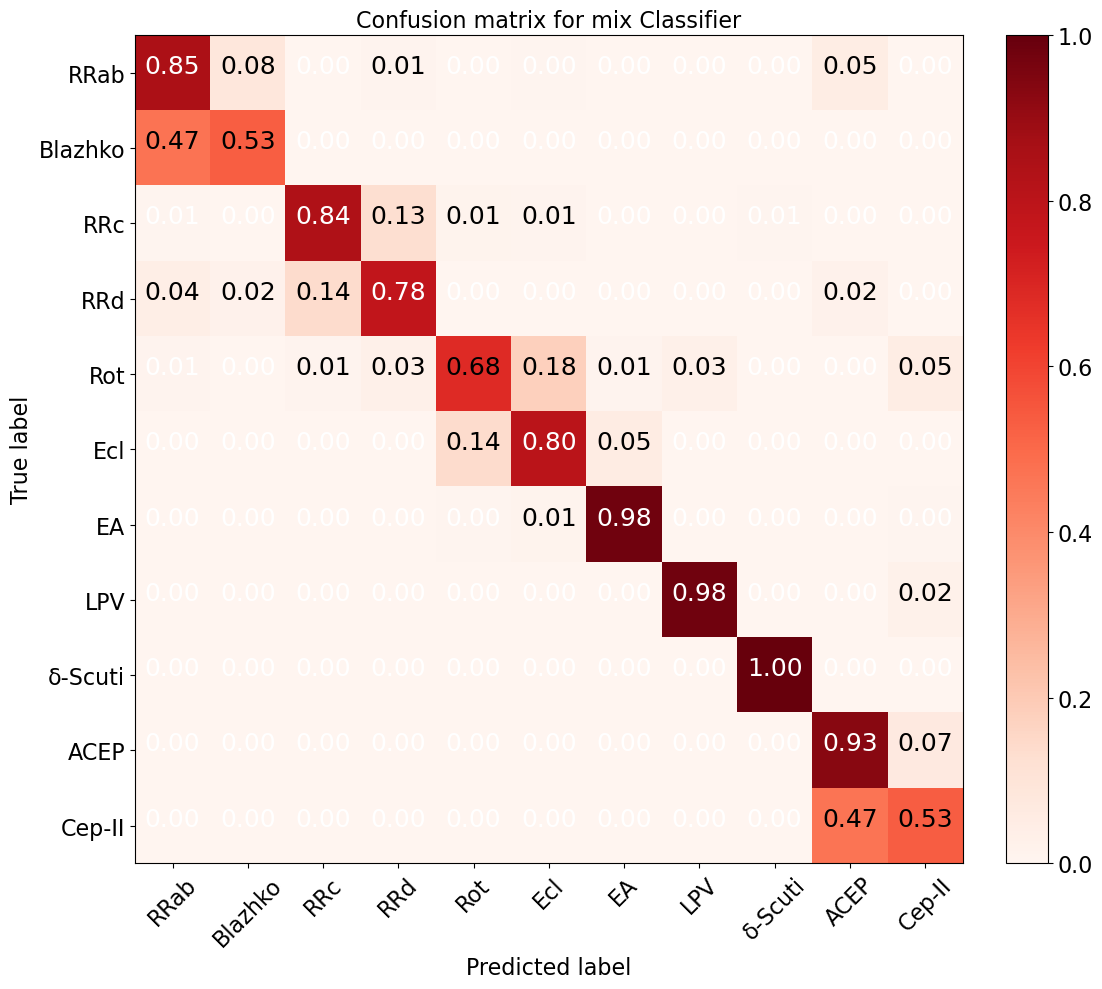

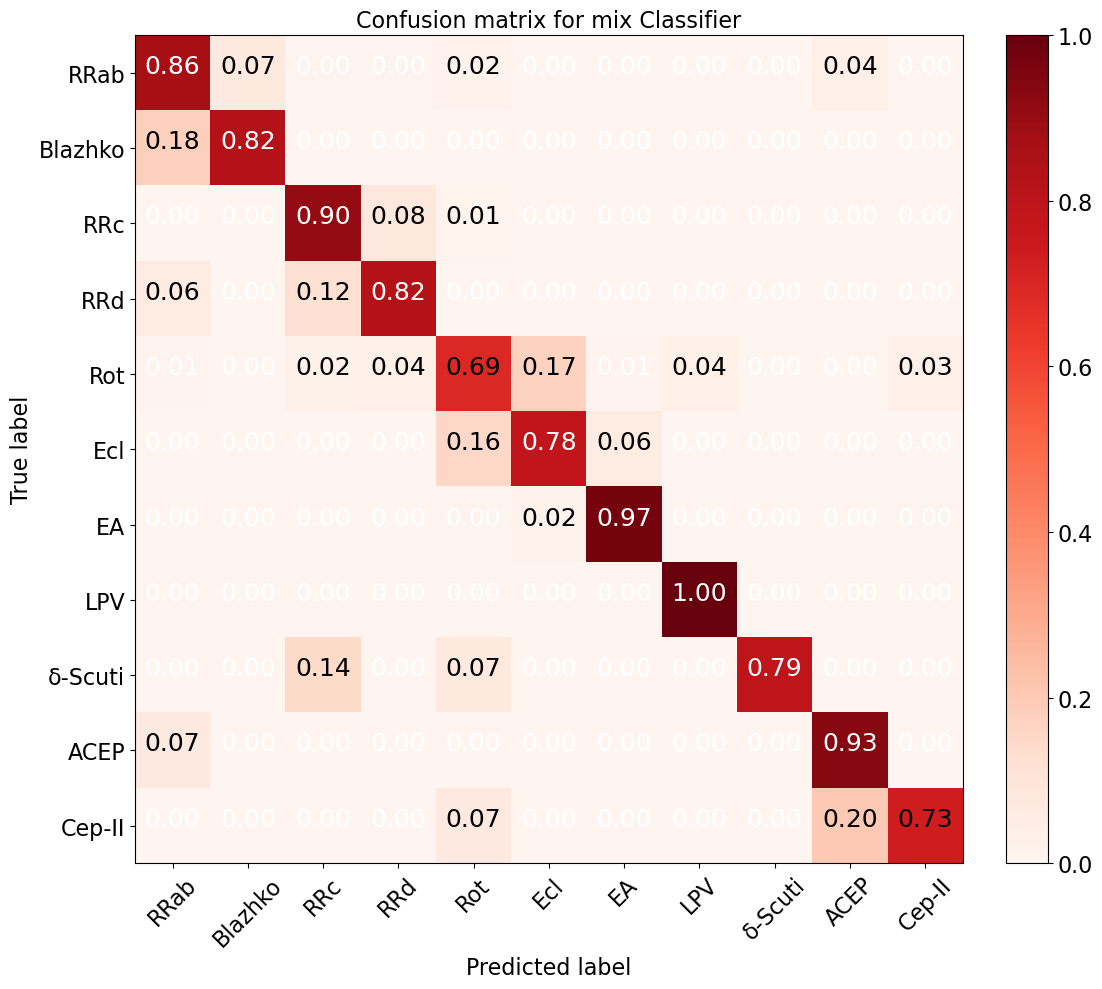

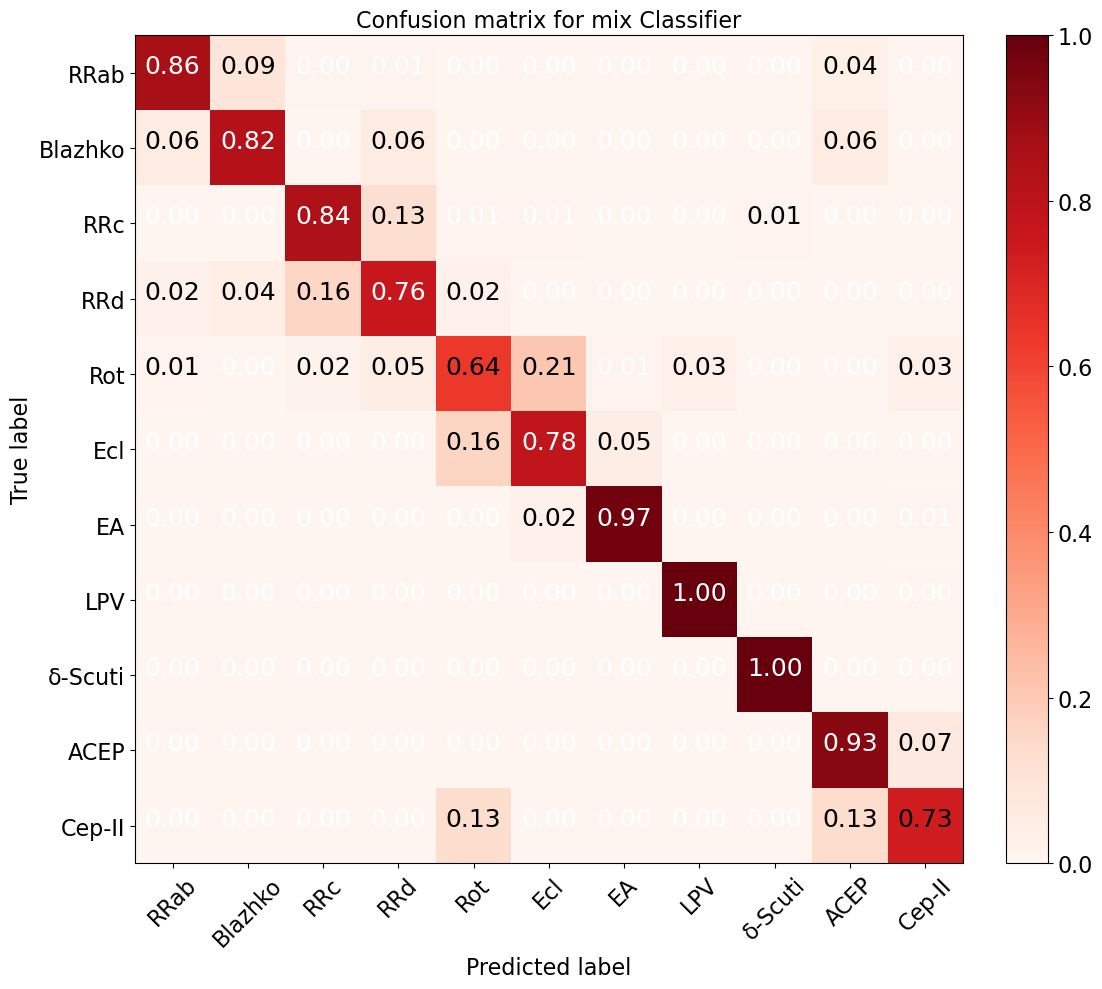

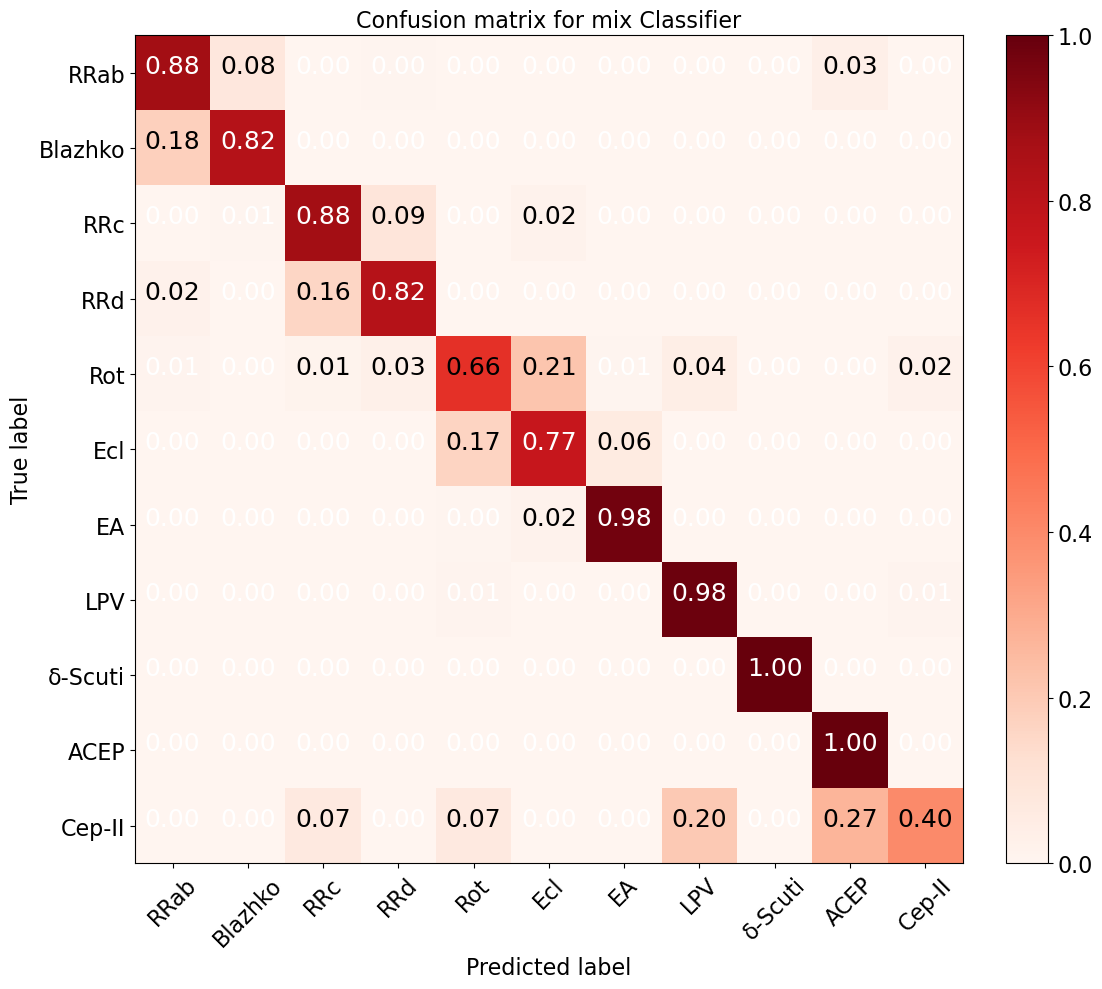

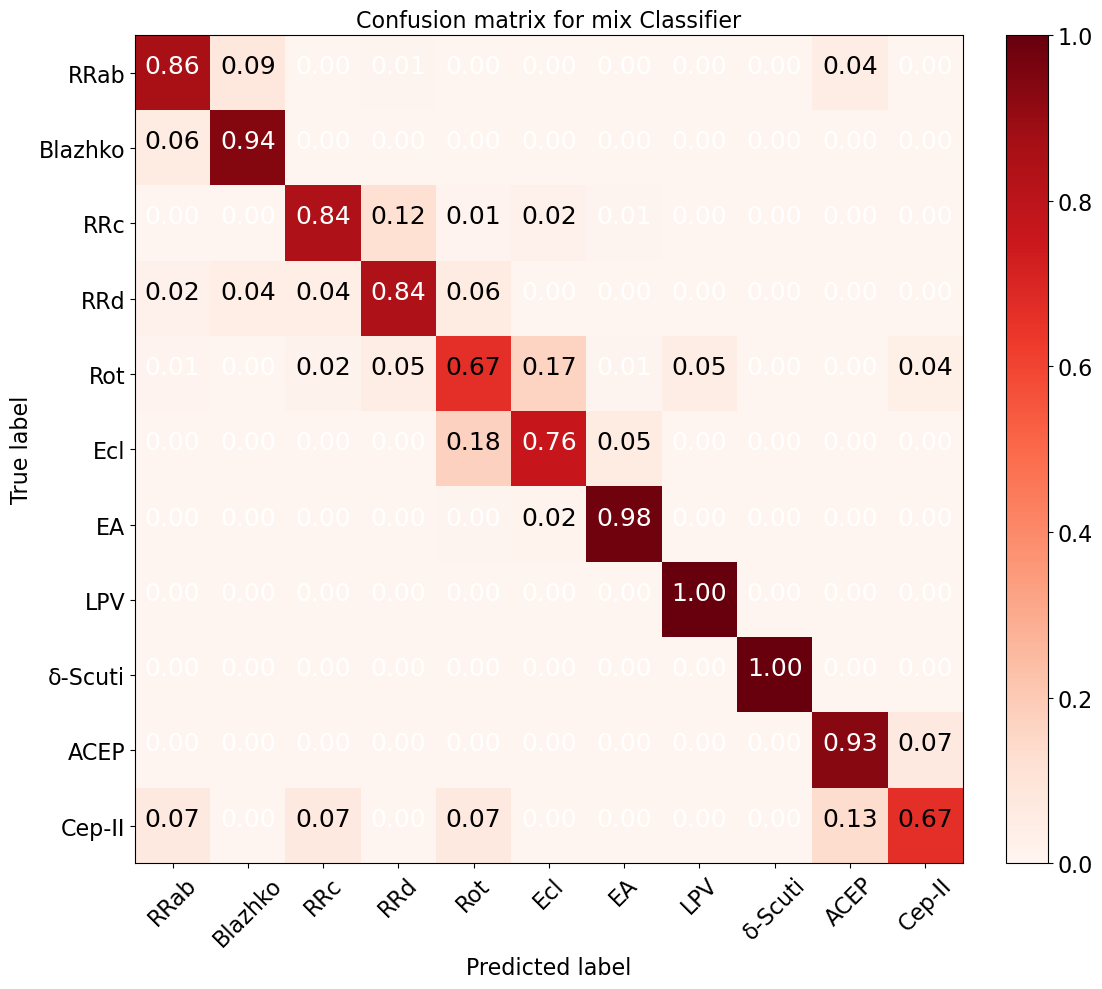

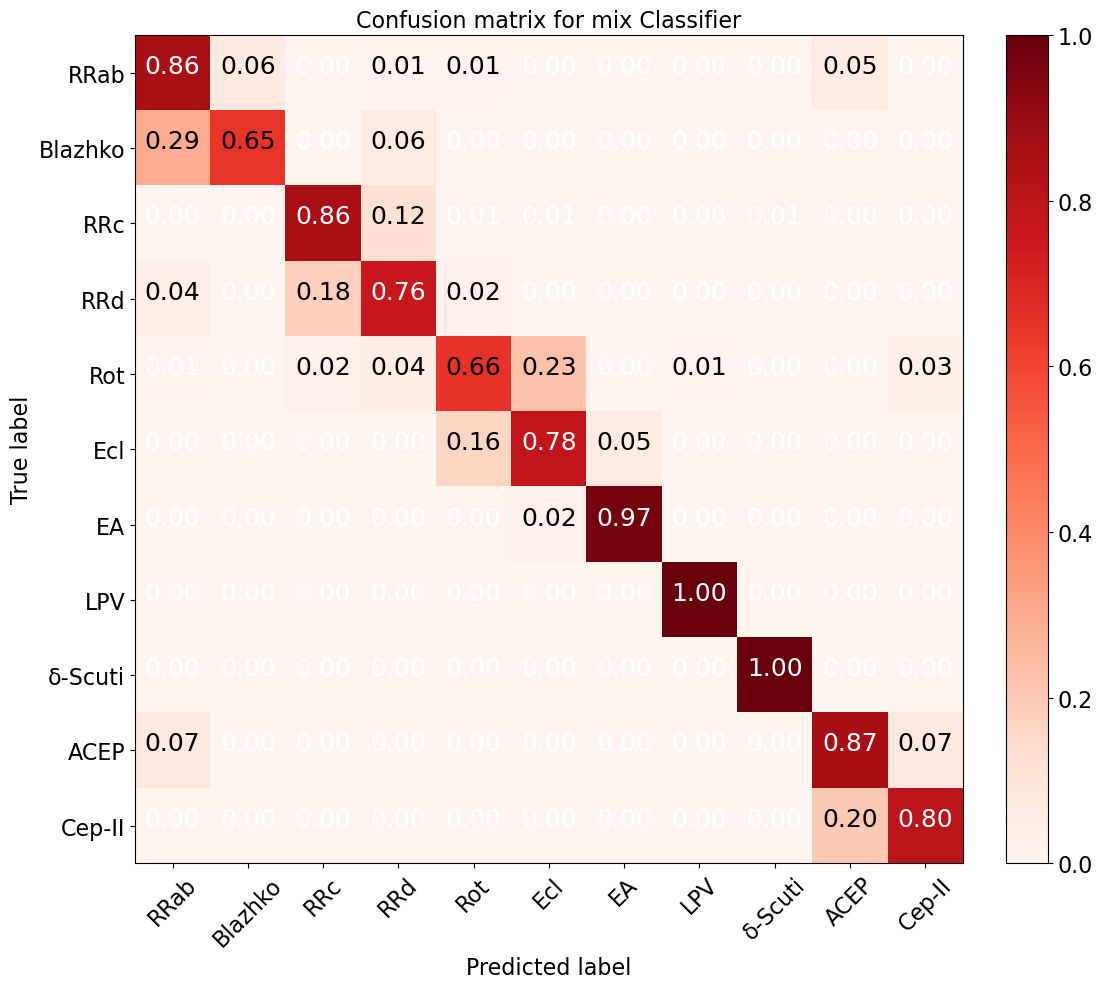

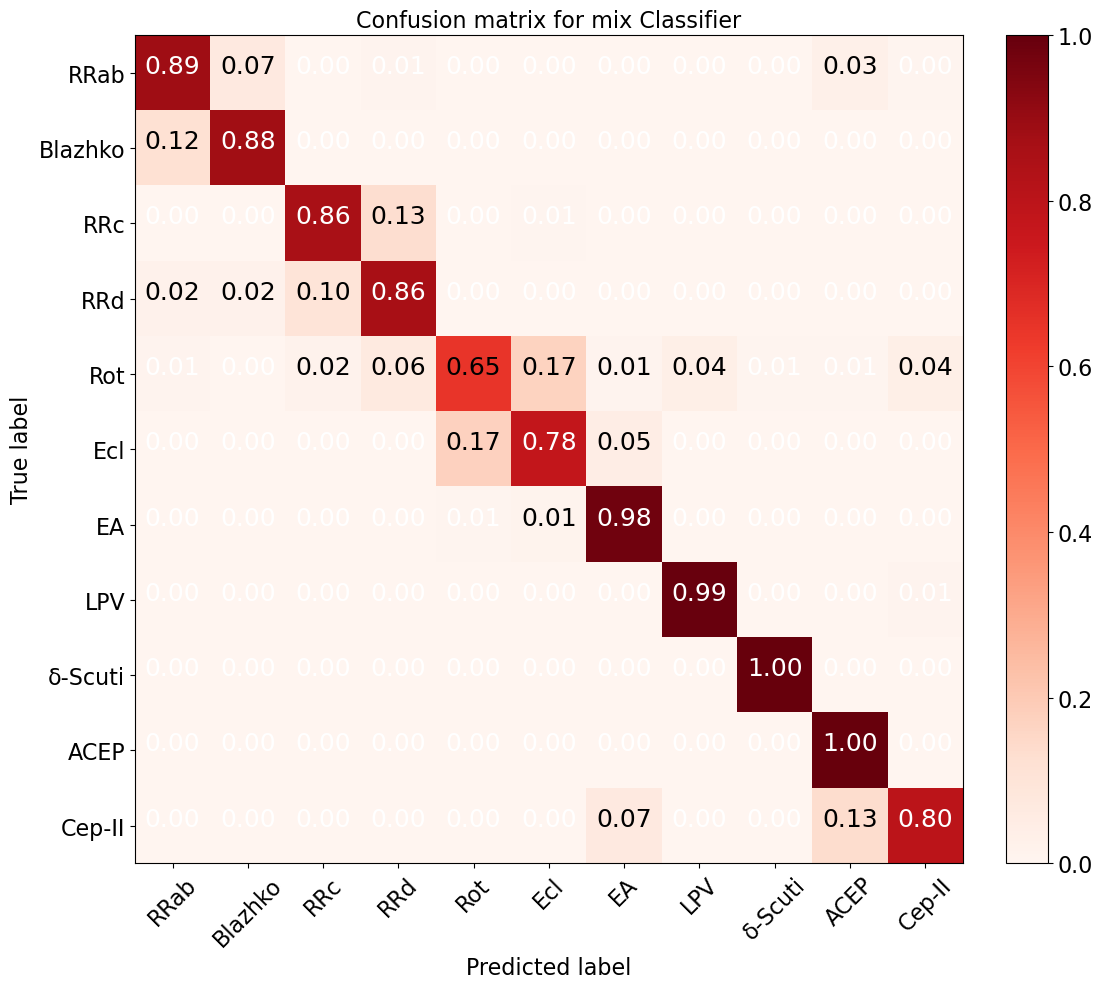

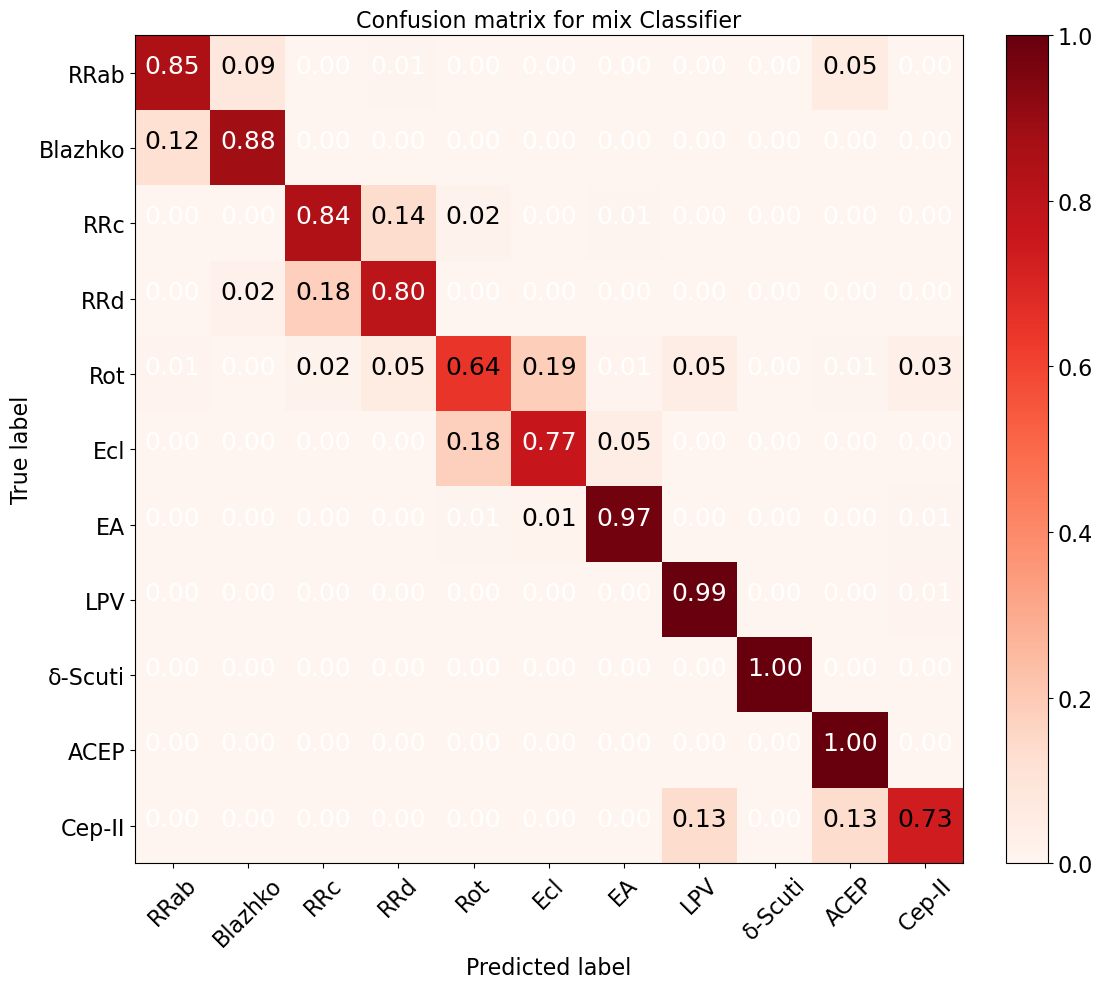

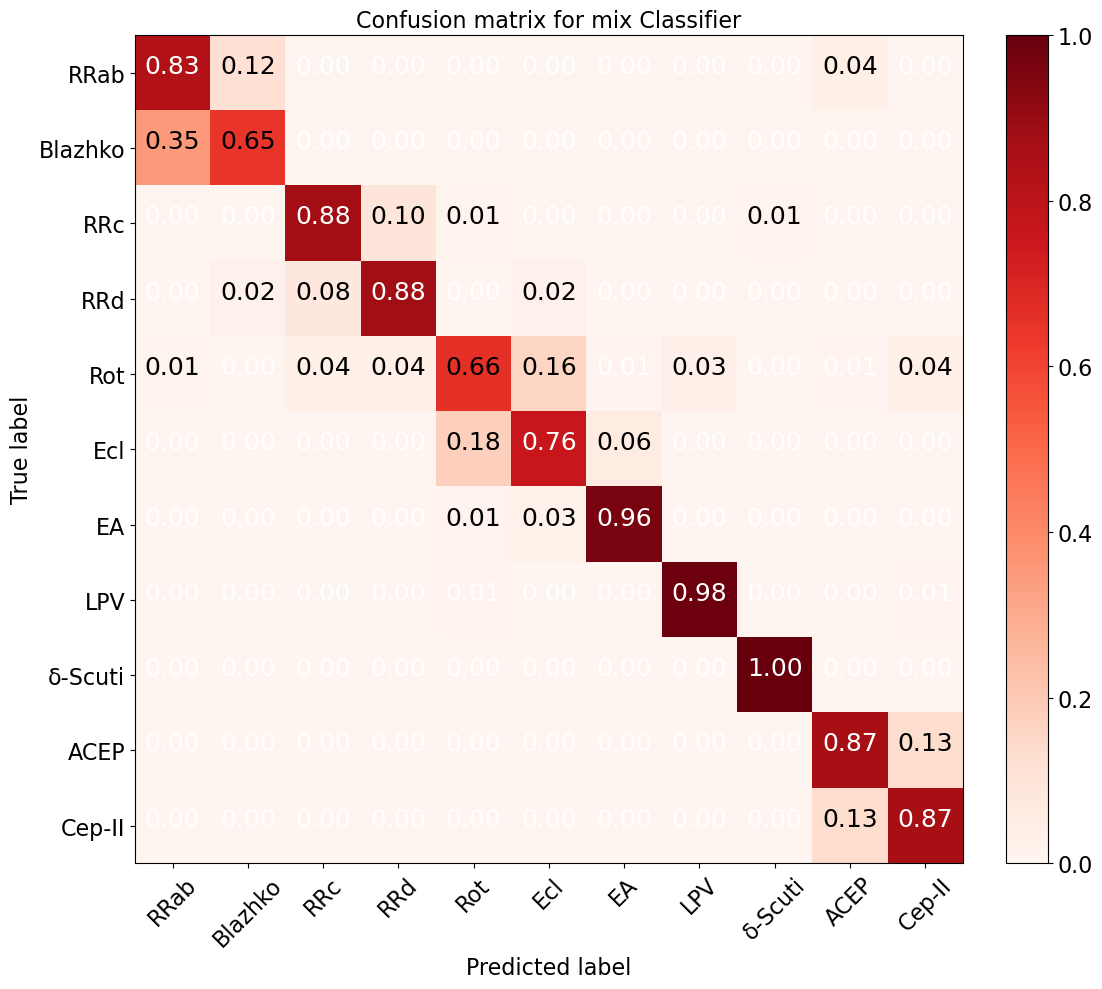

In [8]:
total_cms = []
best_acc_list = [[4, 4, 4, 6, 5, 8, 6, 7, 3, 4],
[4, 4, 3, 3, 5, 8, 2, 4, 4, 4],
[7, 6, 7, 6, 5, 4, 7, 4, 6, 3],
[7, 5, 3, 6, 3, 4, 4, 3, 8, 3],
[10, 4, 4, 5, 5, 6, 7, 6, 7, 4],
[4, 3, 4, 8, 6, 5, 4, 5, 3, 4],
[6, 3, 5, 8, 5, 3, 5, 7, 8, 4],
[6, 5, 6, 5, 4, 3, 4, 3, 7, 4],
[7, 5, 4, 4, 2, 7, 6, 5, 6, 5],
[7, 5, 6, 4, 3, 7, 7, 3, 5, 4]
]
min_loss_list = [[4, 6, 8, 6, 7, 8, 6, 7, 5, 7],
[7, 5, 7, 6, 5, 8, 5, 5, 5, 4],    
[7, 6, 7, 6, 8, 7, 7, 5, 5, 6],
[7, 5, 8, 6, 5, 6, 4, 7, 8, 5],
[6, 5, 7, 5, 5, 6, 5, 6, 7, 5],
[5, 7, 5, 8, 6, 8, 5, 5, 4, 5],
[6, 6, 4, 8, 7, 8, 5, 6, 8, 7],
[7, 5, 6, 5, 8, 5, 4, 3, 5, 4],
[6, 3, 5, 4, 5, 5, 6, 5, 6, 5],
[7, 5, 4, 6, 5, 7, 5, 3, 5, 5]
]
for i in range(0,10):

    # f3 = open('data/split_10fold_No%d_aug_to_15000_down_sample_False_instance0-9/test_data'%i, 'rb')
    f3 = open('data/split_10fold_No%d_aug_to_2500_down_sample_True_instance0-9/test_data'%i, 'rb')
    X_sequence_test, X_feature_test, Y_test = pickle.load(f3)
    f3.close()

    from keras_preprocessing.sequence import pad_sequences
    X_sequence_test_paded = pad_sequences(X_sequence_test, dtype='float', padding='post', value = np.nan)

    from util import preprocess
    X_sequence_test_trimed = preprocess(X_sequence_test_paded)
    X_feature_test = np.array(X_feature_test)
    Y_test = np.array(Y_test)-1
    Y_test_one_hot = keras.utils.to_categorical(Y_test, num_classes=11)

    models = []
    for j in range(0,10):
        lodaed_model = keras.models.load_model('models/10fold%d/bagging0/rnn_with_feature%d/model_%d'%(i,j, best_acc_list[i][j]))
        models.append(lodaed_model)

    test_gen = generate_batch(X_sequence=X_sequence_test_trimed, X_feature=X_feature_test, Y=Y_test, batch_size=128)      
    y_label = Y_test

    y_predict = np.array([])
    for x_sequence, x_image, x_feature, y in test_gen:
        results = []
        for model in models:
            results.append(model.predict({'sequence':x_sequence, 
                                            # 'image':x_image,
                                            'feature':x_feature}))
        average_result = np.sum(results, axis=0)
        y_predict = np.concatenate([y_predict, np.argmax(average_result, axis=-1)])
    y_label = y_label.astype(np.int32) 
    y_predict = y_predict.astype(np.int32) 
    cm = confusion_matrix(y_true=y_label, y_pred=y_predict, normalize='true', 
                          labels=[0,3,1,2,6,4,5,7,8,9,10])
    total_cms.append(cm)

    classes = ['RRab', 'Blazhko','RRc','RRd','Rot', 'Ecl', 'EA' , 'LPV','δ-Scuti','ACEP', 'Cep-II']

    print('cm_no.%d'%i)
    plotting = cm_plot(cm, classes_types=classes, classifier_model='mix Classifier', nClasses=11,
                        cmap=plt.cm.Blues)
    plotting.show()

f = open('total_cms_cross_bagging_best_acc_changed_order','wb')
pickle.dump(total_cms,f)
f.close()

In [4]:
# f = open('total_cms_cross_bagging_min_loss_changed_order','wb')
# pickle.dump(total_cms,f)
# f.close()

Confusion matrix, without normalization
[[8.57638889e-01 8.21759259e-02 2.31481481e-03 8.10185185e-03
  2.31481481e-03 1.15740741e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.93518519e-02 0.00000000e+00]
 [1.76470588e-01 8.23529412e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.58666667e-01 1.20000000e-01
  9.33333333e-03 6.66666667e-03 1.33333333e-03 0.00000000e+00
  4.00000000e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 2.00000000e-02 1.30000000e-01 8.20000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.92837466e-02 4.26997245e-02
  6.58402204e-01 1.83195592e-01 8.26446281e-03 3.44352617e-02
  0.00000000e+00 2.75482094e-03 3.16804408e-02]
 [1.06382979e-03 0.00000000e+00 5.31914894e-04 5.31914894e-04
  1.69946809e-01 7.71010638e-01 5.2659

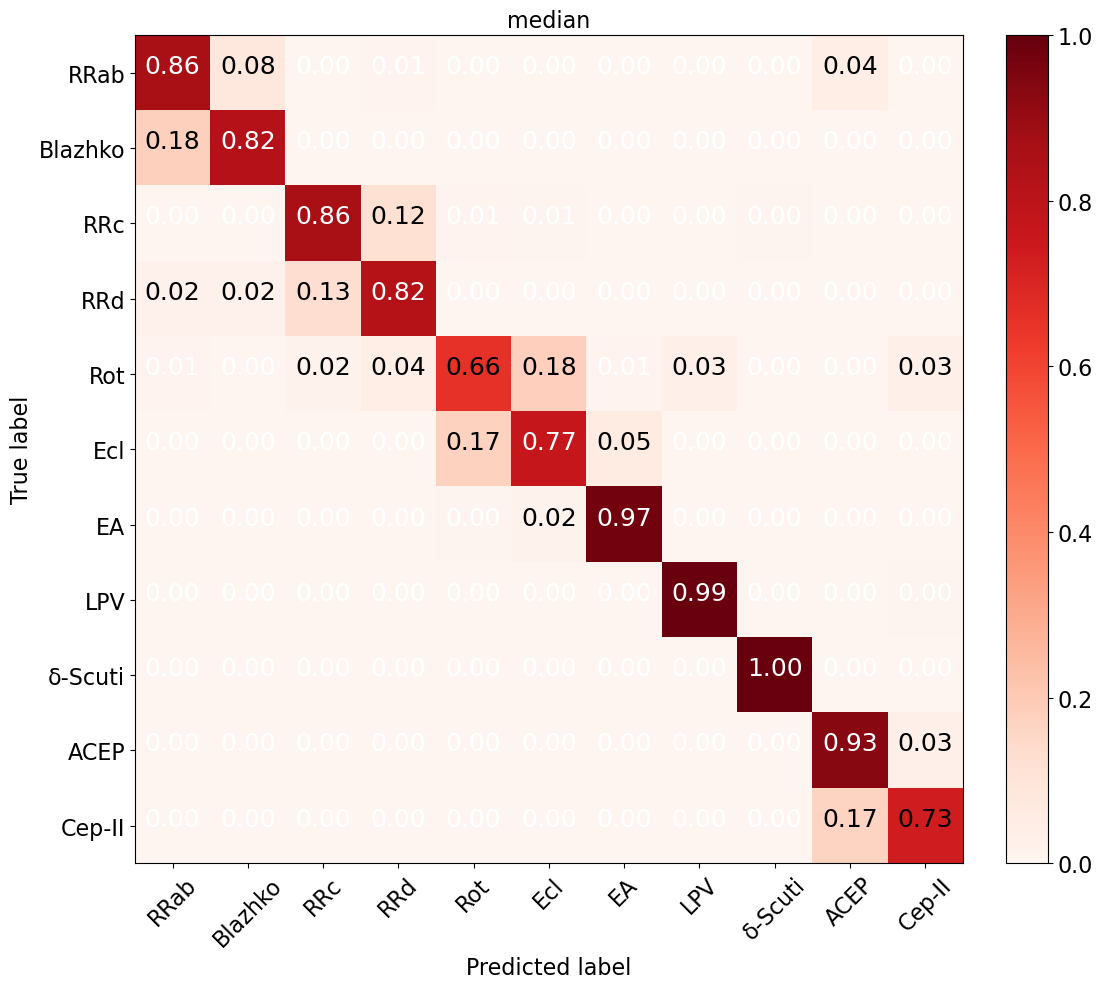

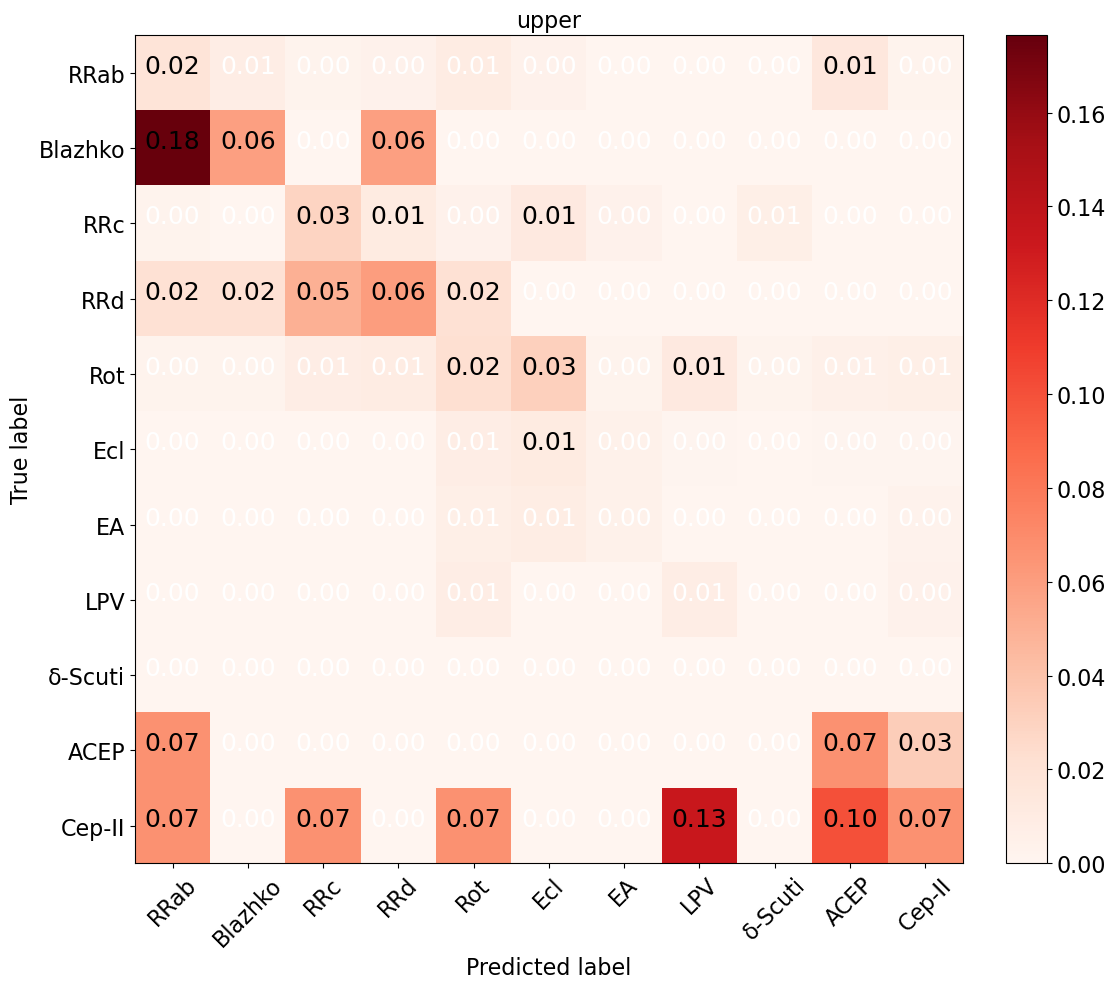

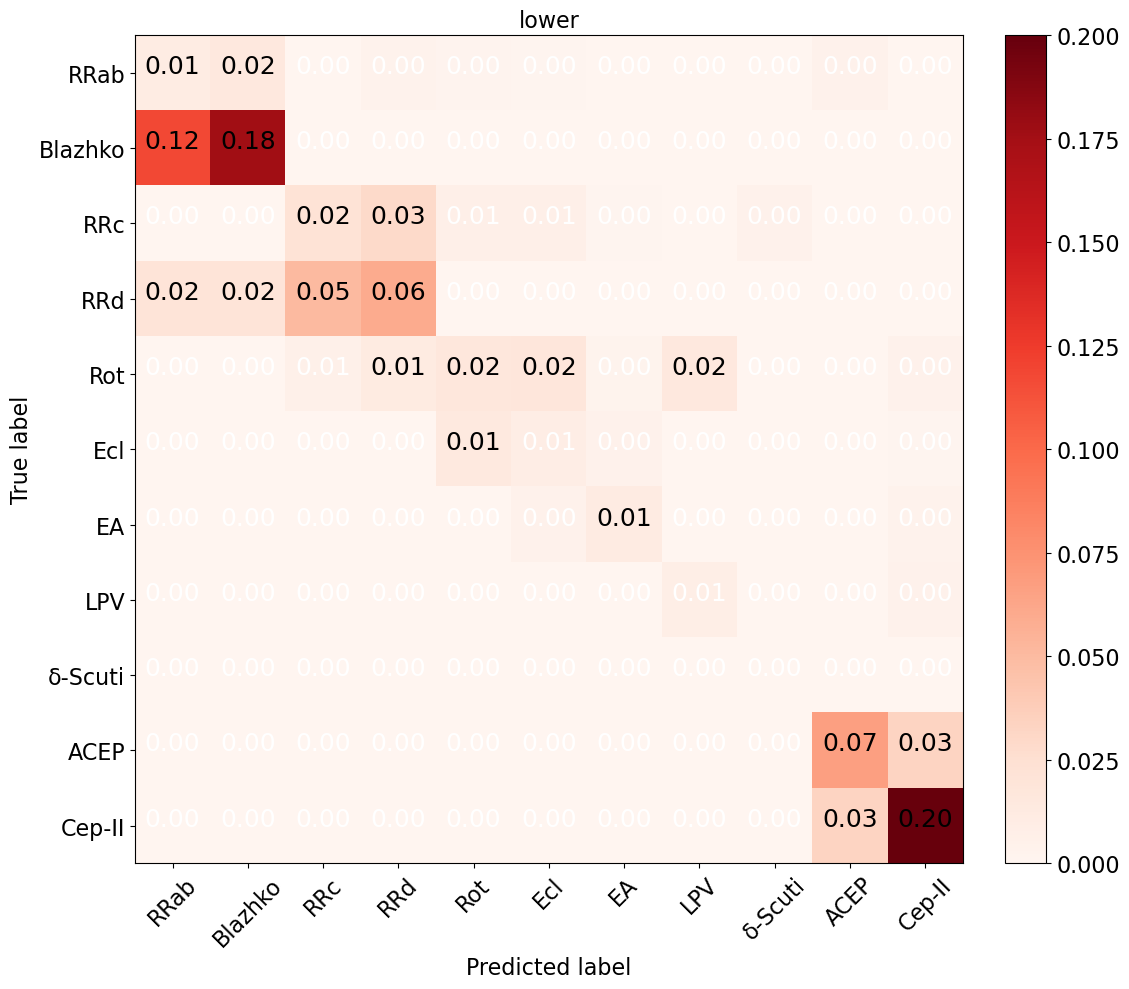

In [30]:
import pickle
f = open('total_cms_cross_bagging_best_acc_changed_order','rb')
total_cms = pickle.load(f)
f.close()
total_cms = np.array(total_cms)
mid_cm = np.median(total_cms, axis=0)
sorted_total_cms = np.sort(total_cms, axis=0)
uppers = np.zeros(mid_cm.shape)
lowers = np.zeros(mid_cm.shape)
for i in range(0,11):
    for j in range(0,11):
        uppers[i][j] = sorted_total_cms[-2][i][j] - mid_cm[i][j]
        lowers[i][j] = mid_cm[i][j] - sorted_total_cms[1][i][j]

from util import plot_confusion_matrix
fig = plot_confusion_matrix(mid_cm, classes, normalize=False, title='median')
fig.show()
fig = plot_confusion_matrix(uppers, classes, normalize=False, title='upper' )
fig.show()
fig = plot_confusion_matrix(lowers, classes, normalize=False, title='lower' )
fig.show()
# f = open('total_cms_cross_bagging_best_acc','wb')
# pickle.dump(total_cms, f)
# f.close()

[[8.57638889e-01 8.21759259e-02 2.31481481e-03 8.10185185e-03
  2.31481481e-03 1.15740741e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.93518519e-02 0.00000000e+00]
 [1.76470588e-01 8.23529412e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.58666667e-01 1.20000000e-01
  9.33333333e-03 6.66666667e-03 1.33333333e-03 0.00000000e+00
  4.00000000e-03 0.00000000e+00 0.00000000e+00]
 [2.00000000e-02 2.00000000e-02 1.30000000e-01 8.20000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.26446281e-03 0.00000000e+00 1.92837466e-02 4.26997245e-02
  6.58402204e-01 1.83195592e-01 8.26446281e-03 3.44352617e-02
  0.00000000e+00 2.75482094e-03 3.16804408e-02]
 [1.06382979e-03 0.00000000e+00 5.31914894e-04 5.31914894e-04
  1.69946809e-01 7.71010638e-01 5.26595745e-02 2.65957447e-04
  0.00000000e+00

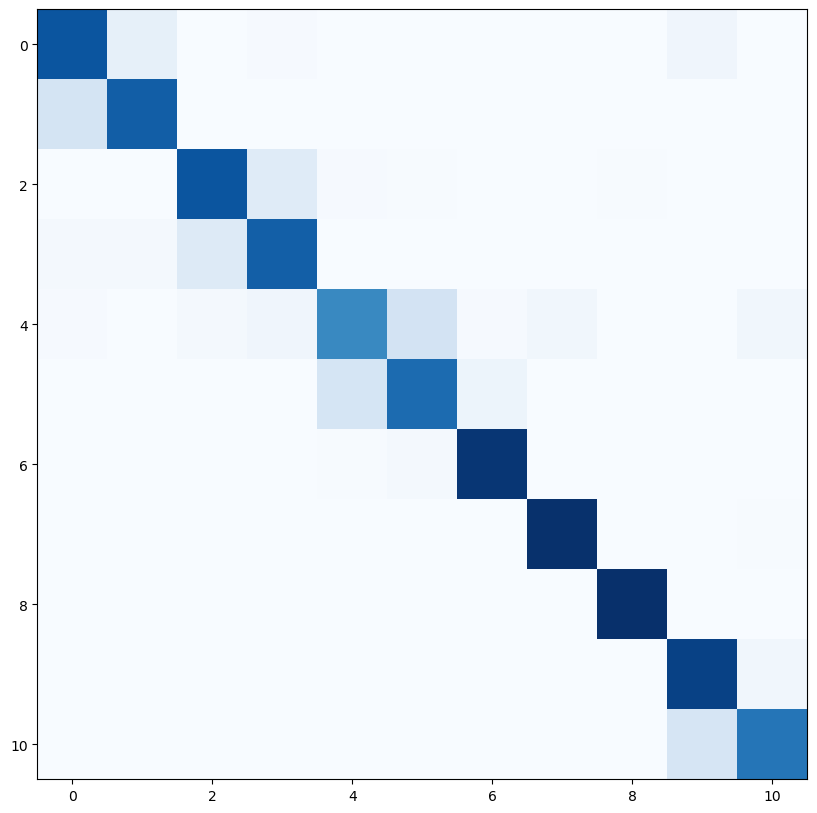

In [31]:
print(mid_cm)
print(uppers.dtype)
print(lowers.dtype)
fig, ax = plt.subplots(figsize=(12, 10))
plt.imshow(mid_cm, interpolation='nearest', cmap=plt.cm.Blues)

Normalized confusion matrix
[[ 86.   8.   0.   1.   0.   0.   0.   0.   0.   4.   0.]
 [ 18.  82.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  86.  12.   1.   1.   0.   0.   0.   0.   0.]
 [  2.   2.  13.  82.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   2.   4.  66.  18.   1.   3.   0.   0.   3.]
 [  0.   0.   0.   0.  17.  77.   5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2.  97.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  99.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  93.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  17.  73.]]


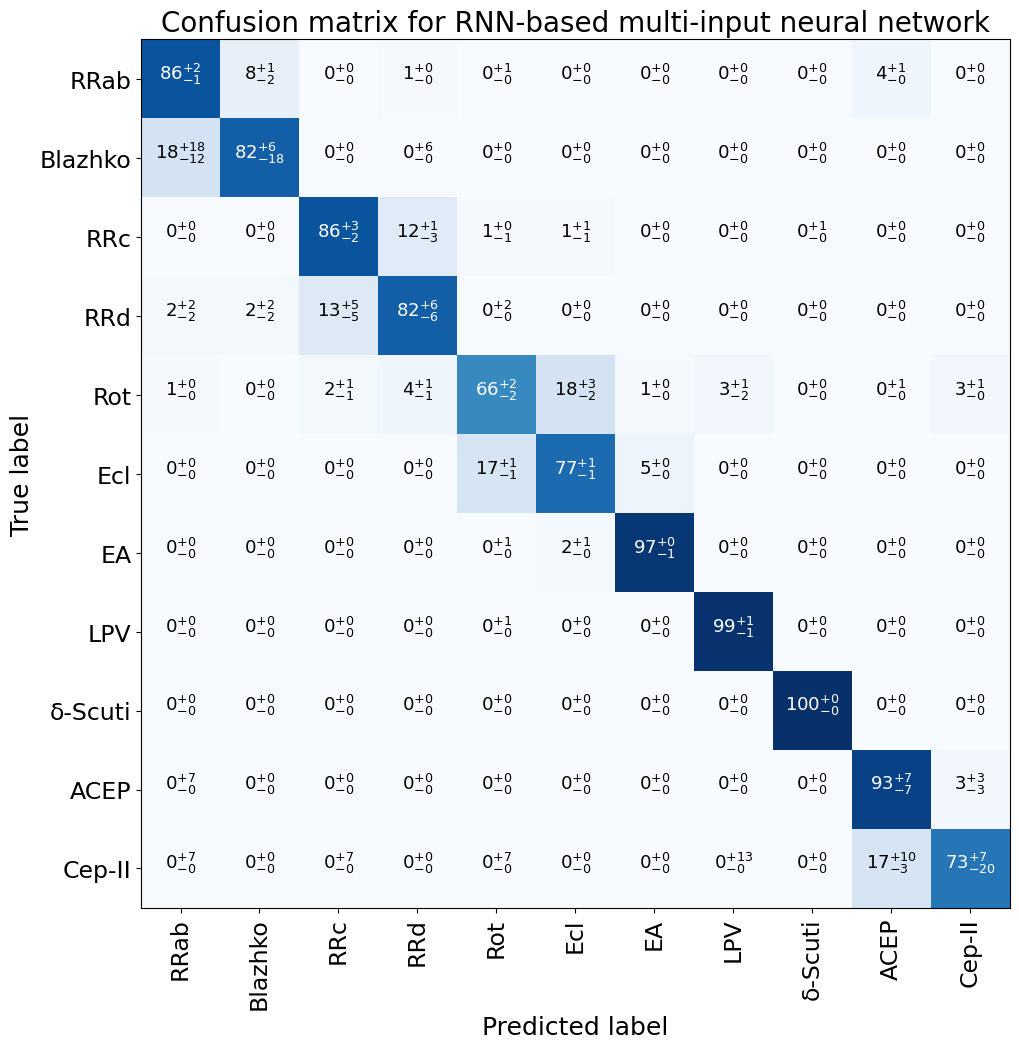

In [43]:

import itertools
from statistics import median
def plot_confusion_matrix(cm, cm_2,cm_3,classes, plot_name,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = np.round(cm * 100)
        print("Normalized confusion matrix")
        cm_2 = np.round(cm_2* 100)
        cm_3 = np.round(cm_3 * 100)
        # cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)
        # print("Normalized confusion matrix")
        # cm_2 = np.round((cm_2.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)
        # cm_3 = np.round((cm_3.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100)

    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=17)
    plt.yticks(tick_marks, classes, fontsize=17)

    # fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%d$_{-%d}^{+%d}$"% (cm[i, j],cm_2[i,j],cm_3[i,j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=13)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix for RNN-based multi-input neural network', fontsize=20)
    plt.savefig(plot_name, bbox_inches='tight')
    # plt.close()
classes = ['RRab', 'Blazhko','RRc','RRd','Rot', 'Ecl', 'EA' , 'LPV','δ-Scuti','ACEP', 'Cep-II']

fig = plot_confusion_matrix(mid_cm, lowers,uppers, classes, 'name',
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
plt.savefig('cross_test.eps', bbox_inches='tight')